In [42]:
import numpy as np
import xarray as xr

In [43]:
tmax = xr.open_dataset('data/esri/MaxTemp_2006_2021_Cali.nc')

In [44]:
print(tmax)

<xarray.Dataset>
Dimensions:                                              (locations: 8991,
                                                          time: 5844)
Coordinates:
    lat                                                  (locations) float64 ...
    lon                                                  (locations) float64 ...
  * time                                                 (time) datetime64[ns] ...
Dimensions without coordinates: locations
Data variables: (12/13)
    projection                                           int32 ...
    x                                                    (locations) float64 ...
    y                                                    (locations) float64 ...
    poly_breaks                                          (locations) int32 ...
    poly_coords                                          (locations) float64 ...
    time_step_ID                                         (time, locations) float64 ...
    ...                               

In [45]:
tmax.attrs

{'subsetType': 'SUBSET',
 'geometry_unit': 'METER',
 'convert_factor': 1.0,
 'alignment': 'END_TIME',
 'reference_time': '',
 'time_size': 1,
 'time_unit': 'DAYS',
 'time_step_label': '1 Day',
 'first_start_time': '2005-12-31 00:00:00',
 'first_end_time': '2006-01-01 00:00:00',
 'last_start_time': '2021-12-30 00:00:00',
 'last_end_time': '2021-12-31 00:00:00',
 'data_min_time': '2006-01-01 00:00:00',
 'data_max_time': '2021-12-31 00:00:00',
 'start_bias': 0.0,
 'end_bias': 0.0,
 'description': 'Space-Time Pattern Mining Panel Cube',
 'history': 'Created by Sun Oct 16 00:38:20 2022',
 'source': 'Space Time Pattern Mining Tools;3.0',
 'feature_type': 'timeSeries',
 'sourceTool': 'Panel',
 'extent': array([-2356112.7933,  -614977.1693,  -504620.7696,  1565790.9055]),
 'esri_pe_string': 'PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.01745329

In [46]:
tmax.data_vars

Data variables:
    projection                                           int32 ...
    x                                                    (locations) float64 ...
    y                                                    (locations) float64 ...
    poly_breaks                                          (locations) int32 ...
    poly_coords                                          (locations) float64 ...
    time_step_ID                                         (time, locations) float64 ...
    location_ID                                          (time, locations) float64 ...
    FIPS                                                 (time, locations) float64 ...
    MAX_TEMPERATURE_NONE_SPATIAL_NEIGHBORS               (time, locations) float64 ...
    MAX_TEMPERATURE_NONE_SPATIAL_NEIGHBORS_TREND_ZSCORE  (locations) float64 ...
    MAX_TEMPERATURE_NONE_SPATIAL_NEIGHBORS_TREND_PVALUE  (locations) float64 ...
    MAX_TEMPERATURE_NONE_SPATIAL_NEIGHBORS_TREND_BIN     (locations) float64 ...
    

In [47]:
df = tmax[["MAX_TEMPERATURE_NONE_SPATIAL_NEIGHBORS_TREND_ZSCORE", "FIPS"]].isel(time=[9]).to_dataframe()

In [48]:
df.head()

,,MAX_TEMPERATURE_NONE_SPATIAL_NEIGHBORS_TREND_ZSCORE,FIPS,lat,lon
locations,time,,,,
0,2006-01-09,0.366612,1765.0,37.867656,-122.231882
1,2006-01-09,1.435818,1766.0,37.848138,-122.249591
2,2006-01-09,1.435818,1767.0,37.840584,-122.254478
3,2006-01-09,1.435818,1768.0,37.848284,-122.257445
4,2006-01-09,1.435818,1769.0,37.848545,-122.264736


In [49]:
df['FIPS'] = df['FIPS'].apply(int)

In [50]:
import plotly.express as px
import matplotlib.pyplot as plt

In [51]:
df.head()

,,MAX_TEMPERATURE_NONE_SPATIAL_NEIGHBORS_TREND_ZSCORE,FIPS,lat,lon
locations,time,,,,
0,2006-01-09,0.366612,1765,37.867656,-122.231882
1,2006-01-09,1.435818,1766,37.848138,-122.249591
2,2006-01-09,1.435818,1767,37.840584,-122.254478
3,2006-01-09,1.435818,1768,37.848284,-122.257445
4,2006-01-09,1.435818,1769,37.848545,-122.264736


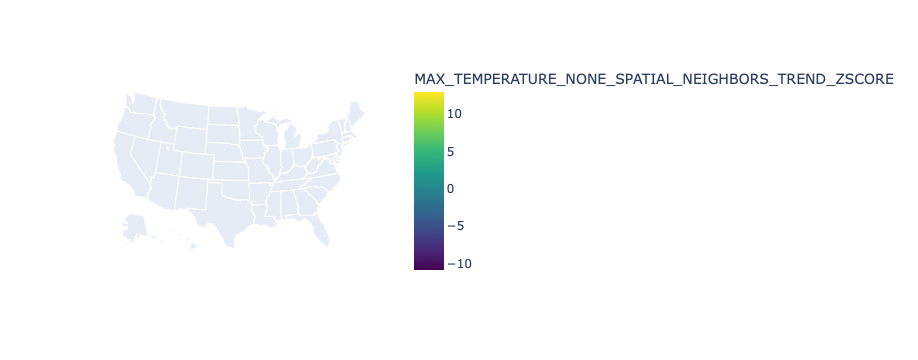

In [52]:
fig = px.choropleth(df, locations="FIPS", color="MAX_TEMPERATURE_NONE_SPATIAL_NEIGHBORS_TREND_ZSCORE",
                    color_continuous_scale="Viridis",
                    scope="usa")

fig.show()

## TEMP MIN

In [53]:
tmin = xr.open_dataset('data/esri/MinTemp_2006_2021_Cali.nc')

In [54]:
tmin.coords

Coordinates:
    lat      (locations) float64 ...
    lon      (locations) float64 ...
  * time     (time) datetime64[ns] 2005-12-31 2006-01-01 ... 2021-12-30

In [55]:
print(tmin)

<xarray.Dataset>
Dimensions:                                              (locations: 8991,
                                                          time: 5844)
Coordinates:
    lat                                                  (locations) float64 ...
    lon                                                  (locations) float64 ...
  * time                                                 (time) datetime64[ns] ...
Dimensions without coordinates: locations
Data variables: (12/13)
    projection                                           int32 ...
    x                                                    (locations) float64 ...
    y                                                    (locations) float64 ...
    poly_breaks                                          (locations) int32 ...
    poly_coords                                          (locations) float64 ...
    time_step_ID                                         (time, locations) float64 ...
    ...                               

In [56]:
tmin.attrs

{'subsetType': 'SUBSET',
 'geometry_unit': 'METER',
 'convert_factor': 1.0,
 'alignment': 'END_TIME',
 'reference_time': '',
 'time_size': 1,
 'time_unit': 'DAYS',
 'time_step_label': '1 Day',
 'first_start_time': '2005-12-31 00:00:00',
 'first_end_time': '2006-01-01 00:00:00',
 'last_start_time': '2021-12-30 00:00:00',
 'last_end_time': '2021-12-31 00:00:00',
 'data_min_time': '2006-01-01 00:00:00',
 'data_max_time': '2021-12-31 00:00:00',
 'start_bias': 0.0,
 'end_bias': 0.0,
 'description': 'Space-Time Pattern Mining Panel Cube',
 'history': 'Created by Sun Oct 16 00:45:15 2022',
 'source': 'Space Time Pattern Mining Tools;3.0',
 'feature_type': 'timeSeries',
 'sourceTool': 'Panel',
 'extent': array([-2356112.7933,  -614977.1693,  -504620.7696,  1565790.9055]),
 'esri_pe_string': 'PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.01745329

In [57]:
tmin.data_vars

Data variables:
    projection                                           int32 ...
    x                                                    (locations) float64 ...
    y                                                    (locations) float64 ...
    poly_breaks                                          (locations) int32 ...
    poly_coords                                          (locations) float64 ...
    time_step_ID                                         (time, locations) float64 ...
    location_ID                                          (time, locations) float64 ...
    FIPS                                                 (time, locations) float64 ...
    MIN_TEMPERATURE_NONE_SPATIAL_NEIGHBORS               (time, locations) float64 ...
    MIN_TEMPERATURE_NONE_SPATIAL_NEIGHBORS_TREND_ZSCORE  (locations) float64 ...
    MIN_TEMPERATURE_NONE_SPATIAL_NEIGHBORS_TREND_PVALUE  (locations) float64 ...
    MIN_TEMPERATURE_NONE_SPATIAL_NEIGHBORS_TREND_BIN     (locations) float64 ...
    

In [58]:
tmin['poly_coords'].to_dataframe()

,lat,lon,poly_coords
locations,,,
0,37.867656,-122.231882,"[-2257301.793400001, 356496.5099999998, -22572..."
1,37.848138,-122.249591,"[-2258186.8135, 353207.18799999915, -2258194.0..."
2,37.840584,-122.254478,"[-2259203.4989, 352033.6821999997, -2259381.80..."
3,37.848284,-122.257445,"[-2259084.125600001, 353696.37450000085, -2259..."
4,37.848545,-122.264736,"[-2259692.4597999994, 353748.05450000055, -225..."
...,...,...,...
8986,39.050329,-121.546676,"[-2160908.1295999996, 467969.9280999992, -2160..."
8987,39.250249,-121.520640,"[-2149542.206599999, 495248.9045000002, -21495..."
8988,39.291833,-121.329852,"[-2140315.4234999996, 496379.28119999915, -214..."


In [59]:
tmin['location_ID'].to_dataframe()

lat         lon  location_ID
time       locations                                    
2005-12-31 0          37.867656 -122.231882          0.0
           1          37.848138 -122.249591          1.0
           2          37.840584 -122.254478          2.0
           3          37.848284 -122.257445          3.0
           4          37.848545 -122.264736          4.0
...                         ...         ...          ...
2021-12-30 8986       39.050329 -121.546676       8986.0
           8987       39.250249 -121.520640       8987.0
           8988       39.291833 -121.329852       8988.0
           8989       39.465359 -121.167910       8989.0
           8990       39.367748 -121.240208       8990.0

[52543404 rows x 3 columns]

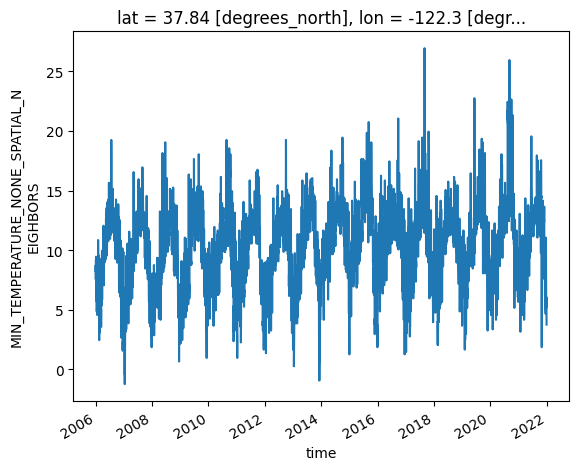

In [60]:
tmin_sample = tmin['MIN_TEMPERATURE_NONE_SPATIAL_NEIGHBORS'].isel(locations=2)
tmin_sample.plot()

In [61]:
temp = tmin[['MIN_TEMPERATURE_NONE_SPATIAL_NEIGHBORS','FIPS']].isel(time=[9]).to_dataframe()
temp.head()

MIN_TEMPERATURE_NONE_SPATIAL_NEIGHBORS    FIPS  \
time       locations                                                   
2006-01-09 0                                        5.749994  1765.0   
           1                                        6.350000  1766.0   
           2                                        6.350000  1767.0   
           3                                        6.350000  1768.0   
           4                                        6.350000  1769.0   

                            lat         lon  
time       locations                         
2006-01-09 0          37.867656 -122.231882  
           1          37.848138 -122.249591  
           2          37.840584 -122.254478  
           3          37.848284 -122.257445  
           4          37.848545 -122.264736

Fips are unique:

In [62]:
len(temp)

8991

In [63]:
len(temp['FIPS'].unique())

8991

## Smoke data

In [64]:
smoke = xr.open_dataset('data/esri/smoke_2006_21_cali.nc')

In [65]:
smoke

<xarray.Dataset>
Dimensions:                                   (locations: 8980, time: 5843)
Coordinates:
    lat                                       (locations) float64 ...
    lon                                       (locations) float64 ...
  * time                                      (time) datetime64[ns] 2006-01-0...
Dimensions without coordinates: locations
Data variables: (12/21)
    projection                                int32 ...
    x                                         (locations) float64 ...
    y                                         (locations) float64 ...
    poly_breaks                               (locations) int32 ...
    poly_coords                               (locations) float64 ...
    time_step_ID                              (time, locations) float64 ...
    ...                                        ...
    SMOKE_DENSITY_NONE_ZEROS_TREND_BIN        (locations) float64 ...
    NUM_SMOKE_PLUMES_NONE_ZEROS               (time, locations) float64 ...
    NUM_SMOKE_PLUMES_NONE_ZEROS_TREND_ZSCORE  (locations) float64 ...
    NUM_SMOKE_PLUMES_NONE_ZEROS_TREND_PVALUE  (locations) float64 ...
    NUM_SMOKE_PLUMES_NONE_ZEROS_TREND_BIN     (locations) float64 ...
    PREDICTION_BINARY_MASK                    (time, locations) float64 ...
Attributes: (12/28)
    subsetType:                 SUBSET
    geometry_unit:              METER
    convert_factor:             1.0
    alignment:                  END_TIME
    reference_time:             
    time_size:                  1
    ...                         ...
    esri_pe_string:             PROJCS["USA_Contiguous_Albers_Equal_Area_Coni...
    projection_authority_code:  102003
    raw_pe_string:              PROJCS["USA_Contiguous_Albers_Equal_Area_Coni...
    location_id_field:          FIPS
    rate_info:                  
    agg_shape_type:             POLYGON

In [67]:
smoke[["SMOKE_DAY_NONE_ZEROS_TREND_ZSCORE", 'lat', 'lon']].to_dataframe()

,SMOKE_DAY_NONE_ZEROS_TREND_ZSCORE,lat,lon
locations,,,
0,12.045886,37.867656,-122.231882
1,12.128918,37.848138,-122.249591
2,12.128918,37.840584,-122.254478
3,12.128918,37.848284,-122.257445
4,12.156249,37.848545,-122.264736
...,...,...,...
8975,11.409171,39.050329,-121.546676
8976,11.486870,39.250249,-121.520640
8977,11.033867,39.291833,-121.329852


In [68]:
smoke["SMOKE_DAY_NONE_ZEROS"]

<xarray.DataArray 'SMOKE_DAY_NONE_ZEROS' (time: 5843, locations: 8980)>
[52470140 values with dtype=float64]
Coordinates:
    lat      (locations) float64 37.87 37.85 37.84 37.85 ... 39.29 39.47 39.37
    lon      (locations) float64 -122.2 -122.2 -122.3 ... -121.3 -121.2 -121.2
  * time     (time) datetime64[ns] 2006-01-01T07:00:00 ... 2021-12-30T07:00:00
Dimensions without coordinates: locations
Attributes:
    long_name:       SMOKE_DAY_NONE_ZEROS
    standard_name:   SMOKE_DAY_NONE_ZEROS
    grid_mapping:    projection
    esri_pe_string:  PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["...
    type:            variable